# Predictive Machine Learning Pipeline - Classification problem

The application will predict the class membership of patients, based on sensor data.

**The pipeline consists of four main sections:**
1. [Setting up environment and getting data](#1.-Set-up-Environment-and-Get-Data)
> python environment and parameters <br>
> other stuff

2. [Explore and prepare training set](#2.-Explore-and-prepare-training-set)
> Split into training and test set <br>
> Plot, plot, and plot, become familiar with the data <br>
> Deal with data types <br>
> Deal with missing values <br>
> Feature selection and feature engineering <br>
3. [Building machine learning models](#3.-Model-building)
> Logistic regression (multinomial) <br>
> Support vector machine <br>
> Decision tree <br>
> Random forest <br>
> XGBoost <br>
4. [Model evaluation and prediction](#4.-Model-Evaluation-and-Prediction)
> Learning curves, model selection <br>
> tuning the model and finaly, <br>
> making predictions! <br>



__[original data source](http://groupware.les.inf.puc-rio.br/har)__ <br>
*Reference:* Velloso, E.; Bulling, A.; Gellersen, H.; Ugulino, W.; Fuks, H. Qualitative Activity Recognition of Weight Lifting Exercises. Proceedings of 4th International Conference in Cooperation with SIGCHI (Augmented Human '13) . Stuttgart, Germany: ACM SIGCHI, 2013. <br>
*Please note that the original purpose of the data (cited research above) has been modified for the sake of this exercise.* 

## 1. Set up Environment and Get Data

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Import packages
import numpy as np
import pandas as pd
import os
import urllib
import tarfile
import itertools

# to ensure 'randomisation' is the same every time 
np.random.seed(5)

# Set up plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

from pandas.plotting import scatter_matrix


# data source
data_url = "https://raw.github.com/fruszi/WoSR/master/ExerciseHealthDataSet.csv" 
# destination file names
data_file = "ExerciseHealthDataSet.csv"

# Saving figures
PROJECT_ROOT_DIR = os.getcwd()
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignore warnings for now - not a good idea in general...
import warnings
warnings.filterwarnings('ignore')

this below is is AZ-specific proxy

In [2]:
prox = {'http': 'http://ukapdlnx005.ukapd.astrazeneca.net:3128/'}
#create an opener object with the proxy defined in it
proxy = urllib.request.ProxyHandler(prox)
opener = urllib.request.build_opener(proxy)
urllib.request.install_opener(opener)

### Load data

In [3]:
# download data, if not already
if not os.path.isfile(data_file):
    print('downloading file: {0}'.format(data_file))
    urllib.request.urlretrieve(data_url, data_file)
else:
    print('file already exists: {0}'.format(data_file))

file already exists: ExerciseHealthDataSet.csv


In [4]:
# load data
data_set = pd.read_csv(data_file)

#### Quick look

In [5]:
data_set.shape

(39242, 159)

In [6]:
# explore data a little
def basic_data_properties(dat):
    feature_count = dat.shape[1]
    cols = list(dat.columns.values)
    NA_count = dat.isnull().sum()
    dtypes = list(dat.dtypes)
    # create and view table with type and NA information
    pd.set_option("display.max_rows",feature_count) #pd.reset_option("^display")
    return pd.DataFrame({'colname': cols, 'dtype': dtypes, 'nas': NA_count}).reset_index(), feature_count, cols 

In [7]:
props, feature_count, cols = basic_data_properties(data_set)
props

,index,colname,dtype,nas
0,user_name,user_name,object,0
1,raw_timestamp_part_1,raw_timestamp_part_1,int64,0
2,raw_timestamp_part_2,raw_timestamp_part_2,int64,0
3,cvtd_timestamp,cvtd_timestamp,object,0
4,new_window,new_window,object,0
5,num_window,num_window,int64,0
6,roll_belt,roll_belt,float64,0
7,pitch_belt,pitch_belt,float64,0
8,yaw_belt,yaw_belt,float64,0
9,total_accel_belt,total_accel_belt,int64,0


### 2. Explore and prepare training set

#### Split into training and test set

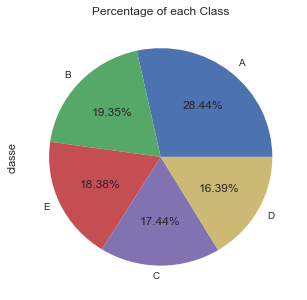

In [8]:
# is there a class imbalance?
fig, axs = plt.subplots(1,1,figsize=(10,5))
data_set.classe.value_counts().plot(x=None,y=None, kind='pie', autopct='%1.2f%%', figsize=(5,5))
axs.set_title("Percentage of each Class")
plt.show()

In [9]:
# yes, there is, we'll need stratified split. Luckily, train_test_split does it already (used to be StratifiedShuffleSplit)
from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(data_set, test_size=0.2, random_state=2)

In [10]:
# let's see:
training_set["classe"].value_counts()/len(training_set)*100

A    28.455388
B    19.361004
E    18.220622
C    17.322333
D    16.640652
Name: classe, dtype: float64

In [11]:
props, feature_count, cols = basic_data_properties(training_set)
props

,index,colname,dtype,nas
0,user_name,user_name,object,0
1,raw_timestamp_part_1,raw_timestamp_part_1,int64,0
2,raw_timestamp_part_2,raw_timestamp_part_2,int64,0
3,cvtd_timestamp,cvtd_timestamp,object,0
4,new_window,new_window,object,0
5,num_window,num_window,int64,0
6,roll_belt,roll_belt,float64,0
7,pitch_belt,pitch_belt,float64,0
8,yaw_belt,yaw_belt,float64,0
9,total_accel_belt,total_accel_belt,int64,0


In [12]:
pd.set_option("display.max_columns",feature_count)
training_set.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,var_accel_arm,avg_roll_arm,stddev_roll_arm,var_roll_arm,avg_pitch_arm,stddev_pitch_arm,var_pitch_arm,avg_yaw_arm,stddev_yaw_arm,var_yaw_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,kurtosis_roll_arm,kurtosis_picth_arm,kurtosis_yaw_arm,skewness_roll_arm,skewness_pitch_arm,skewness_yaw_arm,max_roll_arm,max_picth_arm,max_yaw_arm,min_roll_arm,min_pitch_arm,min_yaw_arm,amplitude_roll_arm,amplitude_pitch_arm,amplitude_yaw_arm,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,kurtosis_roll_dumbbell,kurtosis_picth_dumbbell,kurtosis_yaw_dumbbell,skewness_roll_dumbbell,skewness_pitch_dumbbell,skewness_yaw_dumbbell,max_roll_dumbbell,max_picth_dumbbell,max_yaw_dumbbell,min_roll_dumbbell,min_pitch_dumbbell,min_yaw_dumbbell,amplitude_roll_dumbbell,amplitude_pitch_dumbbell,amplitude_yaw_dumbbell,total_accel_dumbbell,var_accel_dumbbell,avg_roll_dumbbell,stddev_roll_dumbbell,var_roll_dumbbell,avg_pitch_dumbbell,stddev_pitch_dumbbell,var_pitch_dumbbell,avg_yaw_dumbbell,stddev_yaw_dumbbell,var_yaw_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
34147,charles,1322837922,792350,02/12/2011 14:58,no,753,119.00,15.90,-1.07,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,0.11,-0.15,-18,62,-162,29,597,-331,-57.4,-26.60,0.02,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,-1.03,1.00,121,-122,-99,741,-21,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.945531,9.954512,-4.971087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.16,-0.05,2,20,-1,-389.0,485.0,-45.0,-74.7,32.9,-156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.24,1.73,0.16,-447.0,-197.0,-3,-562.0,-170.0,248.0,D
37160,eurico,1322489607,106710,28/11/2011 14:13,no,819,1.17,5.88,-87.60,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.02,0.00,-0.02,-11,4,30,67,581,-417,55.0,24.10,47.70,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.06,0.15,-72,155,-41,265,78,610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.688321,-56.800589,98.244659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,-205,52,317,-423.0,226.0,310.0,-132.0,-64.5,69.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN

#### Remove ID and time stamp variables
move this to the beginning, to data_set

In [13]:
training_set = training_set[cols[6:]]

#### Data types

In [14]:
training_set.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

In [15]:
# some features have #DIV errors besides missing values, forcing dtype to be object 
training_set["kurtosis_yaw_belt"].unique()

array([nan, '#DIV/0!'], dtype=object)

#### Convert features to numeric

In [16]:
# replace DIV errors with nan
training_set = training_set.replace('#DIV/0!',np.nan)

In [17]:
# convert all but class label
training_set.iloc[:,1:-1] = training_set.iloc[:,1:-1].convert_objects(convert_numeric=True)

In [18]:
# the only remaining object is the class label
training_set.dtypes[training_set.dtypes=='object']

classe    object
dtype: object

#### quick look at data

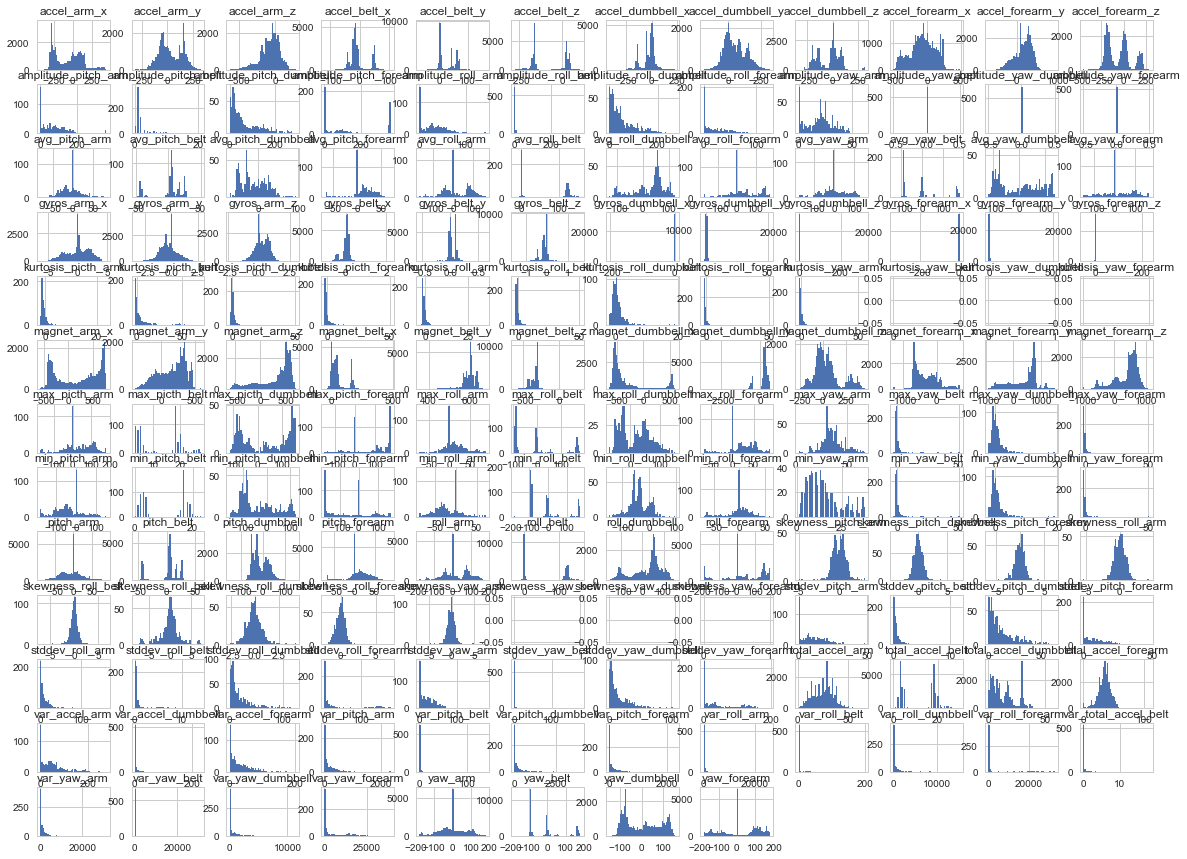

In [19]:
training_set.hist(bins=50, figsize=(20,15))
plt.show()

#### check how many missing datapoints we have

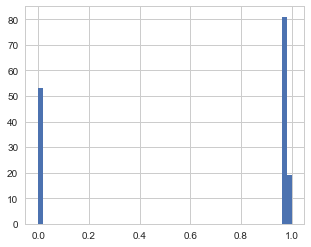

In [20]:
NA_ratio = training_set.isnull().sum() / len(training_set)
NA_ratio.hist(bins=50, figsize=(5,4))
plt.show()

#### remove features where most of (> 95%) the values are missing

In [21]:
features_missing_values = training_set.isnull().sum() / len(training_set) > .95
features_drop = list(features_missing_values[features_missing_values].index)
training_set.drop(features_drop, axis=1, inplace=True)

In [22]:
training_set.shape

(31393, 53)

In [23]:
# check if there are ant NaNs left
props, feature_count, cols = basic_data_properties(training_set)
props

,index,colname,dtype,nas
0,roll_belt,roll_belt,float64,0
1,pitch_belt,pitch_belt,float64,0
2,yaw_belt,yaw_belt,float64,0
3,total_accel_belt,total_accel_belt,int64,0
4,gyros_belt_x,gyros_belt_x,float64,0
5,gyros_belt_y,gyros_belt_y,float64,0
6,gyros_belt_z,gyros_belt_z,float64,0
7,accel_belt_x,accel_belt_x,int64,0
8,accel_belt_y,accel_belt_y,int64,0
9,accel_belt_z,accel_belt_z,int64,0


#### Remove features with very low variance - if any

In [26]:
# see where there are less than 4 unique values, and if some of them have low counts
for col in training_set.columns:
    if (len(training_set[col].unique()) < 4):
        print(training_set[col].value_counts())
        print()

#### Separate features (predictors) and outcome (labels)

In [27]:
train_Y = pd.DataFrame(training_set["classe"])
train_X = training_set.drop("classe", axis=1) 

#### Impute mean value(s) where we have missing data still

In [28]:
from sklearn.preprocessing import Imputer
# might want to look into MICEImputer at one point (multivar imputing) 

imputer = Imputer(strategy="median")

train_X = pd.DataFrame(imputer.fit_transform(train_X), columns=train_X.columns,
                       index = list(train_X.index.values))                           

Saving figure attribute_histogram_plots


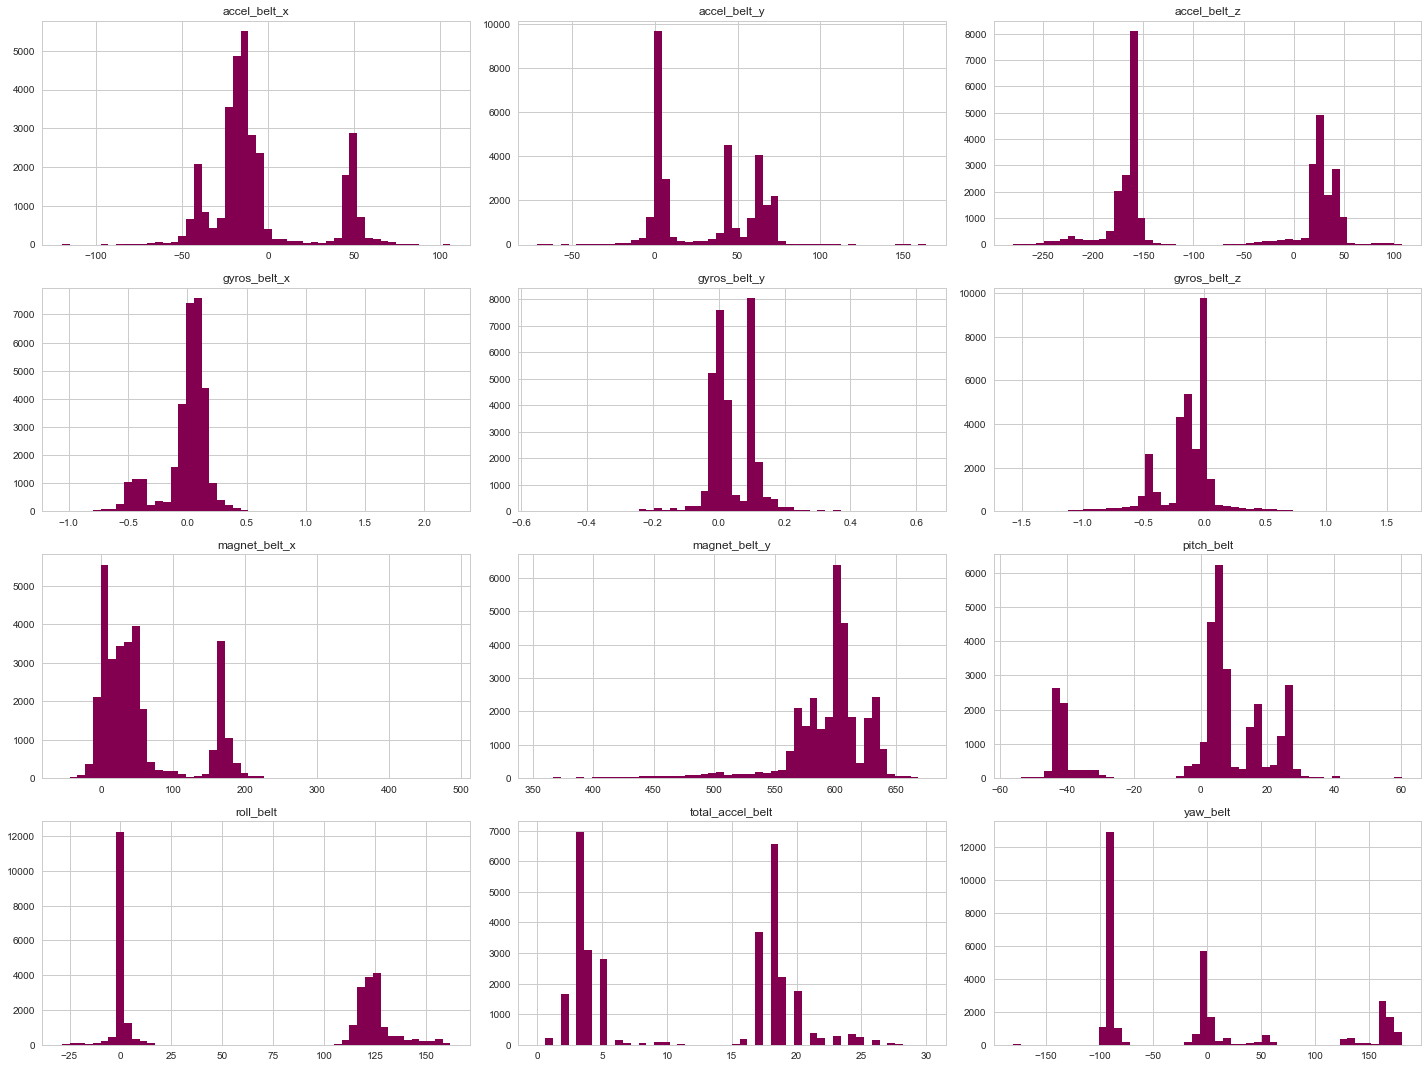

In [29]:
train_X.iloc[:,0:12].hist(bins=50, figsize=(20,15), color='#830051')
save_fig("attribute_histogram_plots")
plt.show()

#### check correlations
will have to review this

RFECV

In [30]:
# check cor, kruskal and kruskalwallis too
from scipy.stats.stats import kendalltau

corr_array = []
for feature_ in train_X.columns.values:
    corr_array.append(kendalltau(train_X[feature_], train_Y['classe']).correlation)

# create an array with absolute values - so neg correlations are also sorted acording to strength  
abs_corr = [abs(coef) for coef in corr_array]

In [63]:
#list top correlations, ordered (abs values)
pd.DataFrame({'feature':train_X.columns.values,'abs_coef':abs_corr}).sort_values(by='abs_coef', ascending=False).iloc[0:10]

,abs_coef,feature
40,0.238016,pitch_forearm
23,0.204642,magnet_arm_x
24,0.189638,magnet_arm_y
20,0.186945,accel_arm_x
46,0.150368,accel_forearm_x
38,0.147866,magnet_dumbbell_z
11,0.145754,magnet_belt_y
49,0.143860,magnet_forearm_x
14,0.132490,pitch_arm
25,0.119656,magnet_arm_z


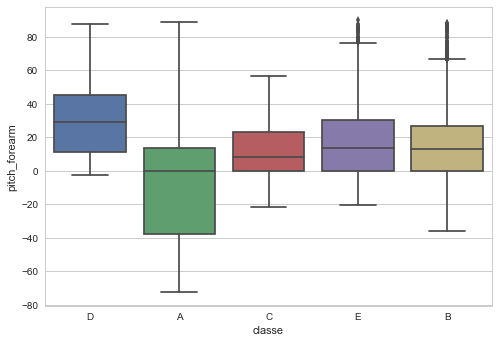

In [32]:
# take a look at the top correlate of class
sns.boxplot(x="classe", y="pitch_forearm", data=pd.concat([train_X, train_Y["classe"]], axis=1));

Saving figure attribute_boxplots


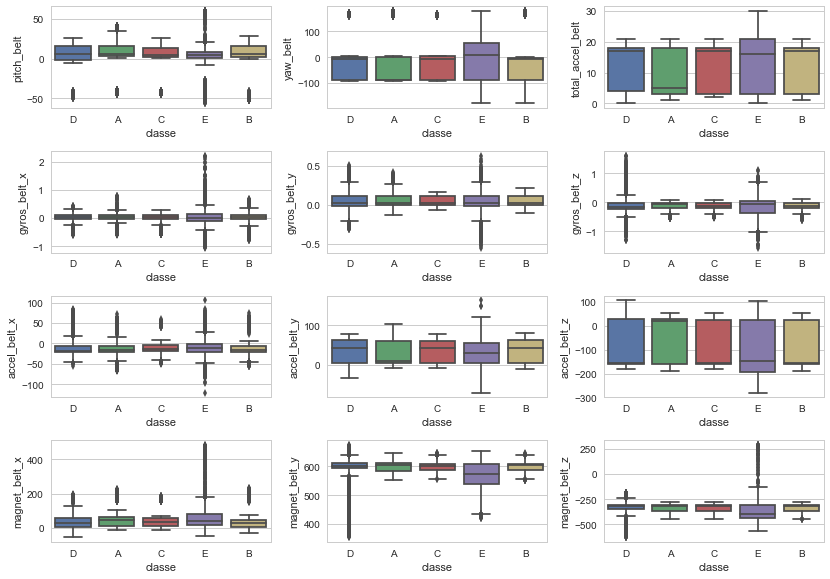

In [33]:
features = train_X.columns.values
sns.set(rc={'figure.figsize':(11.7,8.27)}, style="whitegrid")
for i in range(1, 13):
    plt.subplot(4, 3, i)
    sns.boxplot(x="classe", y=features[i], data=pd.concat([train_X, train_Y["classe"]], axis=1))
                
save_fig("attribute_boxplots")

Saving figure scatter_matrix_plot


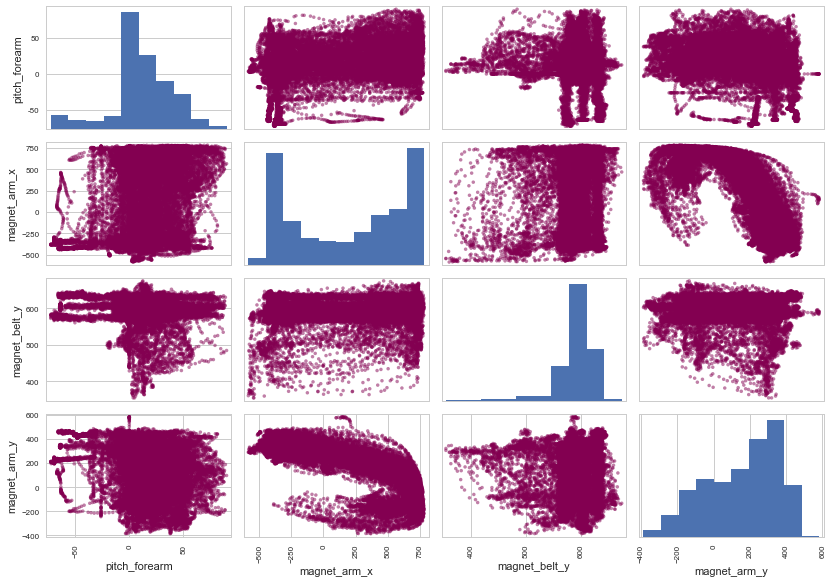

In [34]:
# plot relationships among some of the top features
attributes = ["pitch_forearm", "magnet_arm_x", "magnet_belt_y",
              "magnet_arm_y"]
scatter_matrix(train_X[attributes], color='#830051')
save_fig("scatter_matrix_plot")

#### scale

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns,
                       index = list(train_X.index.values))                      

#### label encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_Ycat = pd.DataFrame(lb.fit_transform(train_Y), columns=train_Y.columns,
                          index = list(train_Y.index.values))

## 3. Model building
there is a crossval confusion matrix for each model - will not put in all in the final version
confusion matrices per each model will also be arranged into a plot with subplots, instead of separate plots

### i) Logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=2, solver='lbfgs')
#LogisticRegression(penalty='l2',C=.01)
log_reg.fit(train_X, train_Ycat)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
predictions = log_reg.predict(train_X)

In [119]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(train_Ycat, predictions)

In [139]:
def conf_matrix_plot(Y, mtx, models):
    classes = np.unique(Y)
    conf_norm = mtx.astype('float') / mtx.sum(axis=1)[:,np.newaxis]                                    # normalized matrix
    f = plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None', vmin=0.0, vmax=1.0)
    #plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' 
    thresh = conf_norm.max() / 2.
    for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
        plt.text(j, i, format(conf_norm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_norm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.title(models)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return(f)

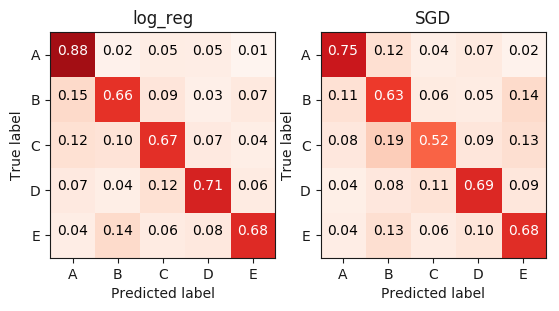

In [140]:
matrx = (conf, sgd_conf)
models = ('log_reg', 'SGD')
for mx in np.arange(len(matrx)):
    plt.subplot(1, 2, mx+1)
    conf_matrix_plot(train_Y, matrx[mx], models[mx])

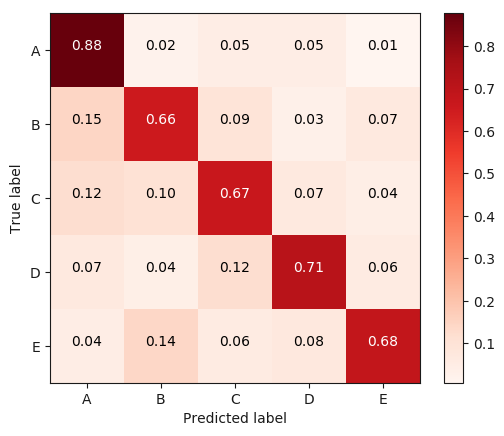

In [46]:
#plt.rcParams['figure.figsize'] = (7,7)
#plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams

classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [47]:
from sklearn.metrics import precision_recall_fscore_support
# other functions: precision_score, recall_score

#precision = precision_score(train_Ycat, predictions, average='weighted')
#recall = recall_score(train_Ycat, predictions, average='weighted')
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

Precision (accuracy): 73.49%
Recall (sensitivity): 73.53%
F1 score: 73.35%


#### Cross-validation

In [ ]:
## crossval iterator
#from sklearn.cross_validation import ShuffleSplit
#cv = ShuffleSplit(train_X.shape[0], n_iter=3, test_size=0.2, random_state=2)

In [ ]:
from sklearn.model_selection import cross_val_predict

train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(log_reg, train_X, train_Ycat, cv=5)
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]                      # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

### Support Vector Machine
understand why this one is relatively weak (and leans towards the first class), or delete from final

In [90]:
from sklearn.linear_model import SGDClassifier
# radial basis function kernel/ kernel approximation
from sklearn.kernel_approximation import RBFSampler

# this actually doesn't help... have to read more about this
#rbf_feature = RBFSampler(gamma=1, random_state=1)
#train_X_rbf = rbf_feature.fit_transform(train_X)

sgd_clf = SGDClassifier(random_state=2)
sgd_clf.fit(train_X, train_Ycat)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=2, shuffle=True, verbose=0,
       warm_start=False)

In [121]:
sgd_predictions = sgd_clf.predict(train_X)
sgd_conf = confusion_matrix(train_Ycat, sgd_predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]                      # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

#### cross val

In [ ]:
train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(sgd_clf, train_X, train_Ycat, cv=5)
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]                      # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_X, train_Ycat)

In [ ]:
predictions = tree_clf.predict(train_X)

In [ ]:
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

#### cross val

In [ ]:
train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(tree_clf, train_X, train_Ycat, cv=5)
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_depth=10, random_state=2)
forest_clf.fit(train_X, train_Ycat)

In [ ]:
predictions = forest_clf.predict(train_X)

In [ ]:
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

#### cross val

In [ ]:
train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(forest_clf, train_X, train_Ycat, cv=5)
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

#### feature importance
move this later to the selected model

In [ ]:
feature_importance = pd.DataFrame(list(zip(strat_valid_X, forest_clf.feature_importances_)))
feature_importance.columns = ('feature','importance')
feature_importance.sort_values(by='importance', ascending=False)[0:9]

In [ ]:
# what happens if we use the first X important features instead of all
#
#

### XGboost

In [ ]:
# in conda:
#git clone --recursive https://github.com/dmlc/xgboost

# Voting is used during classification and averaging is used during regression

In [ ]:
import xgboost as xgb

# model constructor
xgb_clf = xgb.XGBClassifier(colsample_bytree=0.8)
xgb_clf.fit(train_X, train_Ycat)

In [ ]:
predictions = xgb_clf.predict(train_X)

In [ ]:
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]                      # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

#### cross val

In [ ]:
train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(xgb_clf, train_X, train_Ycat, cv=3)    
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]                      # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

In [ ]:
feature_importance = pd.DataFrame(list(zip(train_X, xgb_clf.feature_importances_)))
feature_importance.columns = ('feature','importance')
#feature_importance['unit'] = (1/len(feature_importance))<feature_importance['importance']  # weight smaller than 1/num_features
feature_importance.sort_values(by='importance', ascending=False)[0:15]

#### trying to drop low weight features - doesn't improve model - leave out

In [ ]:
sel_features = (feature_importance['feature'][feature_importance['unit']])

In [ ]:
plt.plot(np.arange(len(feature_importance)),feature_importance['importance'].sort_values(ascending=False))

In [ ]:
# train on selected features
xgb_clf.fit(train_X[sel_features], train_Ycat)

In [ ]:
train_Ycat = np.squeeze(train_Ycat)                                    # reshape labels to (rows,) from (rows,1)
predictions = cross_val_predict(xgb_clf, train_X[sel_features], train_Ycat, cv=10)
conf = confusion_matrix(train_Ycat, predictions)

In [ ]:
f1 = precision_recall_fscore_support(train_Ycat, predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

### Grid search and tuning - just started

#### can we tune log_reg?

In [50]:
# construct an iterator
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(train_X.shape[0], n_iter=10, test_size=0.2, random_state=2)

##### this step takes a minute...

In [51]:
from sklearn.grid_search import GridSearchCV

#Cs = np.arange(1,2)
multitype = ('ovr','multinomial')
classifier = GridSearchCV(estimator=log_reg, cv=cv, param_grid=dict(multi_class=multitype), n_jobs=-1)
classifier.fit(train_X, train_Ycat)

C:\Users\kwgc270\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=ShuffleSplit(31393, n_iter=10, test_size=0.2, random_state=2),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'multi_class': ('ovr', 'multinomial')},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [52]:
classifier.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=2, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Model Evaluation and Prediction

### Diagnostics - learning curves
will arrange into one plot with subplots

In [48]:
# to plot learning curve
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


C:\Users\kwgc270\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\kwgc270\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [ ]:
train_X.size

##### learning curve takes ~half a minute

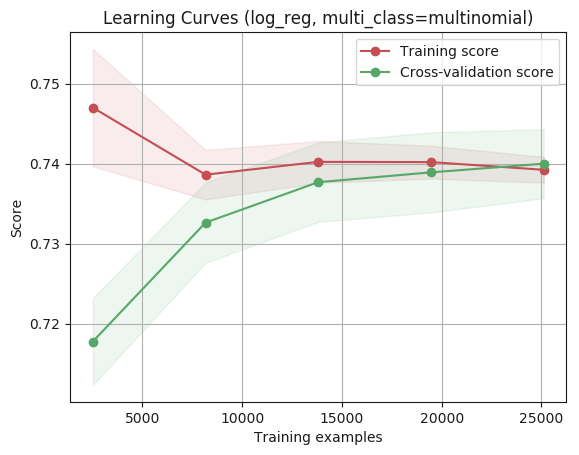

In [53]:
# log_reg
title = 'Learning Curves (log_reg, multi_class=%s)' %classifier.best_estimator_.multi_class
estimator = classifier.best_estimator_
plot_learning_curve(estimator, title, train_X, train_Y, cv=cv)
plt.show()

In [ ]:
# forest_clf
title = 'Learning Curves (forest_clf)' 
estimator = forest_clf
plot_learning_curve(estimator, title, train_X, train_Y, cv=cv)
plt.show()

In [ ]:
# tree_clf
title = 'Learning Curves (tree_clf)' 
estimator = tree_clf
plot_learning_curve(estimator, title, train_X, train_Y, cv=cv)
plt.show()

In [ ]:
# xgb_clf
title = 'Learning Curves (xgb_clf)' 
estimator = xgb_clf
plot_learning_curve(estimator, title, train_X, train_Y, cv=cv)
plt.show()

### Test a couple of them on the test set - ignore this for now

#### Apply preprocessing steps to test set

In [ ]:
props, feature_count, cols = basic_data_properties(test_set)

test_set = test_set[cols[6:]]

# replace DIV errors with nan
test_set = test_set.replace('#DIV/0!',np.nan)

# convert all but class label
test_set.iloc[:,1:-1] = test_set.iloc[:,1:-1].convert_objects(convert_numeric=True)

features_missing_values = test_set.isnull().sum() / len(test_set) > .95
features_drop = list(features_missing_values[features_missing_values].index)
test_set.drop(features_drop, axis=1, inplace=True)

In [ ]:
test_Y = pd.DataFrame(test_set["classe"])
test_X = test_set.drop("classe", axis=1) 

# imputer
test_X = pd.DataFrame(imputer.fit_transform(test_X), columns=test_X.columns,
                       index = list(test_X.index.values))                           # returns array, not dataframe

# scaling
test_X = pd.DataFrame(scaler.fit_transform(test_X), columns=test_X.columns,
                       index = list(test_X.index.values))  

# label encoding
test_Ycat = pd.DataFrame(lb.fit_transform(test_Y), columns=test_Y.columns,
                         index = list(test_Y.index.values))

### Check log_reg

In [ ]:

test_predictions = log_reg.predict(test_X)
conf = confusion_matrix(test_Ycat, test_predictions)

classes = np.unique(test_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(test_Ycat, test_predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))

### Check tree

In [ ]:
test_predictions = tree_clf.predict(test_X)
conf = confusion_matrix(test_Ycat, test_predictions)

classes = np.unique(train_Y)
conf_norm = conf.astype('float') / conf.sum(axis=1)[:,np.newaxis]                                    # plot normalized matrix
plt.imshow(conf_norm, cmap=plt.cm.Reds, interpolation='None')
plt.colorbar()
plt.grid(False)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = conf_norm.max() / 2.
for i, j in itertools.product(range(conf_norm.shape[0]), range(conf_norm.shape[1])):
    plt.text(j, i, format(conf_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_norm[i, j] > thresh else "black")

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
f1 = precision_recall_fscore_support(test_Ycat, test_predictions, average='weighted')

print("Precision (accuracy): %.2f%%" % (f1[0] * 100.0))
print("Recall (sensitivity): %.2f%%" % (f1[1] * 100.0))
print("F1 score: %.2f%%" % (f1[2] * 100.0))